<a href="https://colab.research.google.com/github/soyoonjeong/ITCareerfit/blob/main/%EC%9B%8C%ED%81%AC%EB%84%B7_%ED%81%AC%EB%A1%A4%EB%A7%81_%EB%B0%8F_%EB%8D%B0%EC%9D%B4%ED%84%B0_%EB%B6%84%EC%84%9D.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import requests
from bs4 import BeautifulSoup
import seaborn as sns

# 워크넷 크롤링

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/크롤링/크롤링데이터_워크넷/워크넷_데이터_20230511.csv")

In [ ]:
len(df)

866

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 866 entries, 0 to 865
Data columns (total 16 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    866 non-null    float64
 1   company_name  866 non-null    object 
 2   title         866 non-null    object 
 3   min_pay       866 non-null    float64
 4   max_pay       866 non-null    float64
 5   info_loc      866 non-null    float64
 6   type          866 non-null    float64
 7   regDt         866 non-null    object 
 8   deadline      866 non-null    object 
 9   position      708 non-null    object 
 10  post_url      866 non-null    object 
 11  content       866 non-null    object 
 12  min_career    866 non-null    float64
 13  max_career    866 non-null    float64
 14  dead          866 non-null    float64
 15  last_check    866 non-null    object 
dtypes: float64(8), object(8)
memory usage: 108.4+ KB


In [ ]:
df.head()

,Unnamed: 0.1,Unnamed: 0,company_name,title,min_pay,max_pay,info_loc,type,regDt,deadline,position,post_url,content,min_career,max_career,dead,last_check
0,0,0.0,엠제이인스텍,NH농협생명 전산상황실 관리,2520.0,2520.0,4.143032e+11,10.0,2023-05-10,2023-07-01,['시스템/네트워크'],http://www.work.go.kr/empDetailRedirect.do?wan...,"<div class=""careers-table"">\n<table>\n<caption...",-1.0,-1.0,0.0,2023-05-10
1,1,1.0,나우픽스,나우픽스 웹디자이너 모집,2500.0,2500.0,4.311432e+11,10.0,2023-05-10,2023-07-09,['웹 퍼블리싱'],http://www.work.go.kr/empDetailRedirect.do?wan...,"<div class=""careers-table"">\n<table>\n<caption...",-1.0,-1.0,0.0,2023-05-10
2,2,2.0,경림전기,"전자 입찰 분석 하실 분 구합니다.(전기,소방,통...",4200.0,6000.0,1.168042e+11,10.0,2023-05-10,2023-07-09,"['머신러닝', '인공지능(AI)']",http://www.work.go.kr/empDetailRedirect.do?wan...,"<div class=""careers-table"">\n<table>\n<caption...",1.0,20.0,0.0,2023-05-10
3,3,3.0,주식회사 셈틀컴퍼니,PHP 개발 가능한 개발자 를 모집합니다. (1...,3000.0,4500.0,4.115034e+11,10.0,2023-05-10,2023-06-10,"['iOS', '인공지능(AI)']",http://www.work.go.kr/empDetailRedirect.do?wan...,"<div class=""careers-table"">\n<table>\n<caption...",1.0,20.0,0.0,2023-05-10
4,4,4.0,경찰공제회,[(사)경찰공제회] 전산정보 일반직 직원 채용,3671.0,6173.0,1.144021e+11,20.0,2023-05-10,2023-06-01,['시스템/네트워크'],http://www.work.go.kr/empDetailRedirect.do?wan...,"<div class=""careers-table"">\n<table>\n<caption...",1.0,20.0,0.0,2023-05-10


In [ ]:
df.to_csv("/content/drive/MyDrive/크롤링/크롤링데이터_워크넷/워크넷_데이터_20230511.csv")

## 워크넷 파싱 함수

In [ ]:
#항목 parsing 함수작성하기
def parse():
    try:
        COMPANY = wanted.find("company").get_text()
        TITLE = wanted.find("title").get_text()
        SAL_TMNM = wanted.find("salTpNm").get_text()
        SAL = wanted.find("sal").get_text()
        MIN_SAL = wanted.find("minSal").get_text()
        MAX_SAL = wanted.find("maxSal").get_text()
        REGION = wanted.find("strtnmCd").get_text() # 도로명주소로 수정
        empTp = wanted.find("empTpCd").get_text()
        CAREER = wanted.find("career").get_text()
        regDt = wanted.find("regDt").get_text()
        closeDt = wanted.find("closeDt").get_text()
        jobsCd = wanted.find("jobsCd").get_text()
        detail = wanted.find("wantedInfoUrl").get_text()
        return {
            "company_name":COMPANY,
            "title":TITLE,
            "pay_type":SAL_TMNM,
            "min_pay": MIN_SAL,
            "max_pay": MAX_SAL,
            "info_loc":REGION,
            "type":empTp,
            "career":CAREER,
            "regDt": regDt,
            "deadline":closeDt,
            "position":jobsCd,
            "post_url":detail
        }
    except AttributeError as e:
        return {
            "company_name":None,
            "title":None,
            "pay_type":None,
            "min_pay": None,
            "max_pay": None,
            "location":None,
            "type":None,
            "career":None,
            "regDt":None,
            "deadline":None,
            "position":None,
            "post_url":None
        }

In [ ]:
#크롤링할 페이지 설정
page_no=10000

#
df=pd.DataFrame()
for i in range(1, page_no):
  #url 잘게 자르기
  url = "http://openapi.work.go.kr/opi/opi/opia/wantedApi.do"
  serviceKey = "?authKey=WNKXZRZNR5AUCD0GJSCZJ2VR1HK"

  # 호출할 페이지 타입 (L: 목록, D:상세)
  Calltp = "&callTp=L"
  Return = "&returnType=XML"

  # 검색 시작위치 지정 (최대 1000 까지 가능)
  StartPage="&startPage="+str(i)

  #출력건수
  Display = "&display=100"

  #직종코드 입력
  occupation = "&occupation=023|024|025|026"

  #직종코드 입력
  workerCnt=""

  #키워드 설정
  # keyword = "&keyword=AI, 인공지능, ai"
  keyword=""


  #parsing 하기
  result = requests.get(url+
                        serviceKey+
                        Calltp+
                        Return+
                        StartPage+
                        Display+
                        occupation+
                        workerCnt+
                        keyword)
  soup = BeautifulSoup(result.text,'lxml-xml')
  wanteds = soup.find_all("wanted")

  if len(wanteds)==0:
    break

  row = []
  for wanted in wanteds:
    row.append(parse())

  #pandas df데이터프레임에 추가
  df=df.append(row, ignore_index=True)


<ipython-input-16-6e9e0a8ddac0>:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df.append(row, ignore_index=True)
<ipython-input-16-6e9e0a8ddac0>:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df.append(row, ignore_index=True)
<ipython-input-16-6e9e0a8ddac0>:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df.append(row, ignore_index=True)
<ipython-input-16-6e9e0a8ddac0>:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df.append(row, ignore_index=True)
<ipython-input-16-6e9e0a8ddac0>:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

In [ ]:
original_df = df

In [ ]:
len(df)

907

##url로 채용공고 크롤링

In [ ]:
# df['content'] = None

In [ ]:
# 이 부분은 처음 한번만 실행하면 됌.
# 코드 수정 - "The reason is that the last Ubuntu update update supports chromium driver just via snap."
# 최근 우분투 업데이트에서 크롬 드라이버 설치를 snap을 이용해서만 하도록 바뀜
# 고로 snap 없이 설치하는 아래 우회 코드로 변경
# 출처 : https://colab.research.google.com/drive/1cbEvuZOhkouYLda3RqiwtbM-o9hxGLyC
# 출처2 : https://stackoverflow.com/questions/75155063/selenium-use-chrome-on-colab-got-unexpectedly-exited

%%shell
# Ubuntu no longer distributes chromium-browser outside of snap
#
# Proposed solution: https://askubuntu.com/questions/1204571/how-to-install-chromium-without-snap

# Add debian buster
cat > /etc/apt/sources.list.d/debian.list <<'EOF'
deb [arch=amd64 signed-by=/usr/share/keyrings/debian-buster.gpg] http://deb.debian.org/debian buster main
deb [arch=amd64 signed-by=/usr/share/keyrings/debian-buster-updates.gpg] http://deb.debian.org/debian buster-updates main
deb [arch=amd64 signed-by=/usr/share/keyrings/debian-security-buster.gpg] http://deb.debian.org/debian-security buster/updates main
EOF

# Add keys
apt-key adv --keyserver keyserver.ubuntu.com --recv-keys DCC9EFBF77E11517
apt-key adv --keyserver keyserver.ubuntu.com --recv-keys 648ACFD622F3D138
apt-key adv --keyserver keyserver.ubuntu.com --recv-keys 112695A0E562B32A

apt-key export 77E11517 | gpg --dearmour -o /usr/share/keyrings/debian-buster.gpg
apt-key export 22F3D138 | gpg --dearmour -o /usr/share/keyrings/debian-buster-updates.gpg
apt-key export E562B32A | gpg --dearmour -o /usr/share/keyrings/debian-security-buster.gpg

# Prefer debian repo for chromium* packages only
# Note the double-blank lines between entries
cat > /etc/apt/preferences.d/chromium.pref << 'EOF'
Package: *
Pin: release a=eoan
Pin-Priority: 500


Package: *
Pin: origin "deb.debian.org"
Pin-Priority: 300


Package: chromium*
Pin: origin "deb.debian.org"
Pin-Priority: 700
EOF

# Install chromium and chromium-driver
apt-get update
apt-get install chromium chromium-driver

# Install selenium
pip install selenium
pip install bs4

Executing: /tmp/apt-key-gpghome.g2sN5MjMCH/gpg.1.sh --keyserver keyserver.ubuntu.com --recv-keys DCC9EFBF77E11517
gpg: key DCC9EFBF77E11517: public key "Debian Stable Release Key (10/buster) <debian-release@lists.debian.org>" imported
gpg: Total number processed: 1
gpg:               imported: 1
Executing: /tmp/apt-key-gpghome.ZS0vY4NzWA/gpg.1.sh --keyserver keyserver.ubuntu.com --recv-keys 648ACFD622F3D138
gpg: key DC30D7C23CBBABEE: public key "Debian Archive Automatic Signing Key (10/buster) <ftpmaster@debian.org>" imported
gpg: Total number processed: 1
gpg:               imported: 1
Executing: /tmp/apt-key-gpghome.VSbIRYudvO/gpg.1.sh --keyserver keyserver.ubuntu.com --recv-keys 112695A0E562B32A
gpg: key 4DFAB270CAA96DFA: public key "Debian Security Archive Automatic Signing Key (10/buster) <ftpmaster@debian.org>" imported
gpg: Total number processed: 1
gpg:               imported: 1
Get:1 http://deb.debian.org/debian buster InRelease [122 kB]
Get:2 http://deb.debian.org/debian bust

In [ ]:
# -*- coding: UTF-8 -*-
import time
from selenium import webdriver
from selenium.webdriver.common.by import By
import pandas as pd
from bs4 import BeautifulSoup

In [ ]:
#Colab에선 웹브라우저 창이 뜨지 않으므로 별도 설정한다.

options = webdriver.ChromeOptions()
options.add_argument('--headless')        # Head-less 설정
options.add_argument('--no-sandbox')
options.add_argument('--disable-dev-shm-usage')
driver = webdriver.Chrome('chromedriver', options=options)

In [ ]:
start = 166
end = 167
for i in range(start, end+1):
  try:
    url = df.loc[i, 'post_url']
    driver.get(url)
    time.sleep(2)
    html = driver.page_source
    soup = BeautifulSoup(html, 'html.parser')
    table = soup.select_one("div.careers-table")
    df.loc[i, 'content'] = str(table)
  except:
    df.loc[i, 'dead'] = int(1)
  #response = requests.get(url)
  # html = response.text s
  # soup = BeautifulSoup(html, "html.parser")
  # table = soup.select_one("div.careers-table")
  # print(table)
  # df.loc[i, 'content'] = str(table)

In [ ]:
df.loc[0, 'content']

## dead, last_check 추가

In [ ]:
from datetime import datetime

df['dead'] = 0
df['last_check'] = str(datetime.now().date())

In [ ]:
df.head()

,company_name,title,pay_type,min_pay,max_pay,info_loc,type,career,regDt,deadline,position,post_url,dead,last_check
0,금호정밀주식회사,자동차부품제조회사 전산IT 담당자 모집_경기화성,연봉,30000000,40000000,415903210149,10,경력,23-05-26,채용시까지 23-07-25,134303,http://www.work.go.kr/empDetailRedirect.do?wan...,0,2023-05-26
1,(주)벰소프트,물류로봇 주행제어 S/W 개발 프로그래머,연봉,35200000,35200000,264403136075,20,신입,23-05-26,23-07-25,133202,http://www.work.go.kr/empDetailRedirect.do?wan...,0,2023-05-26
2,글피,"IoT, 스마트팩토리 전문기업에서 H/W, F/W...",연봉,30000000,30000000,481214781644,10,신입,23-05-26,23-06-09,153206,http://www.work.go.kr/empDetailRedirect.do?wan...,0,2023-05-26
3,(주)피엔티,기계 설계 경력사원 모집,연봉,40000000,70000000,471903308065,10,경력,23-05-26,채용시까지 23-06-30,159104,http://www.work.go.kr/empDetailRedirect.do?wan...,0,2023-05-26
4,(주)우리끼리,[무인키즈카페] 마케팅담당자 모집공고,연봉,30000000,50000000,302004301366,20,경력,23-05-26,채용시까지 23-06-25,026102,http://www.work.go.kr/empDetailRedirect.do?wan...,0,2023-05-26


# 워크넷 데이터

## 데이터 자료형 변환

In [ ]:
# 'deadline(채용마감)' 자료형을 날짜형으로 변환
df['deadline'] = "20" + df['deadline'].str[-8:]
df['regDt'] = "20" + df['regDt'].str[-8:]

df['company_name'] = df['company_name'].astype('string')
df['title'] = df['title'].astype('string')
df['pay_type'] = df['pay_type'].astype('string')
df['info_loc'] = df['info_loc'].astype('string')
df['career'] = df['career'].astype('string')
df['post_url'] = df['post_url'].astype('string')
df['position'] = df['position'].astype('string')


df['min_pay'] = df['min_pay'].astype('int')
df['max_pay'] = df['max_pay'].astype('int')


In [ ]:
df['company_name'] = df['company_name'].apply(lambda x : x.replace('(주)',''))
df['company_name'] = df['company_name'].apply(lambda x : x.replace('(사)',''))
df['company_name'] = df['company_name'].apply(lambda x : x.replace('(유)',''))
df['company_name'] = df['company_name'].apply(lambda x : x.replace('(재)',''))

## 최소임금 / 최대임금 추가

In [ ]:
# pay 처리
df.loc[df['pay_type'].str.contains('월급'),'min_pay']=df['min_pay']*12//10000
df.loc[df['pay_type'].str.contains('월급'),'max_pay']=df['max_pay']*12//10000
df.loc[df['pay_type'].str.contains('연봉'),'min_pay']=df['min_pay']//10000
df.loc[df['pay_type'].str.contains('연봉'),'max_pay']=df['max_pay']//10000

df.loc[df['max_pay']==0,'max_pay']=df['min_pay']

In [ ]:
df['max_pay'].value_counts()

3000    137
5000     75
4000     74
6000     71
3600     63
       ... 
3900      1
6173      1
4320      1
2798      1
3480      1
Name: max_pay, Length: 87, dtype: int64

In [ ]:
df.drop(['pay_type'], axis = 1, inplace = True)

In [ ]:
df.head()

,company_name,title,min_pay,max_pay,info_loc,type,career,regDt,deadline,position,post_url,dead,last_check
0,금호정밀주식회사,자동차부품제조회사 전산IT 담당자 모집_경기화성,3000,4000,415903210149,10,경력,2023-05-26,2023-07-25,134303,http://www.work.go.kr/empDetailRedirect.do?wan...,0,2023-05-26
1,벰소프트,물류로봇 주행제어 S/W 개발 프로그래머,3520,3520,264403136075,20,신입,2023-05-26,2023-07-25,133202,http://www.work.go.kr/empDetailRedirect.do?wan...,0,2023-05-26
2,글피,"IoT, 스마트팩토리 전문기업에서 H/W, F/W...",3000,3000,481214781644,10,신입,2023-05-26,2023-06-09,153206,http://www.work.go.kr/empDetailRedirect.do?wan...,0,2023-05-26
3,피엔티,기계 설계 경력사원 모집,4000,7000,471903308065,10,경력,2023-05-26,2023-06-30,159104,http://www.work.go.kr/empDetailRedirect.do?wan...,0,2023-05-26
4,우리끼리,[무인키즈카페] 마케팅담당자 모집공고,3000,5000,302004301366,20,경력,2023-05-26,2023-06-25,026102,http://www.work.go.kr/empDetailRedirect.do?wan...,0,2023-05-26


## 최소경력 / 최대경력 추가

In [ ]:
def make_min_career(row):
    if row == '경력':
      return int(1)
    elif row == '관계없음':
      return int(-1)
    else:
      return int(0)

df['min_career'] = df['career'].apply(make_min_career)

In [ ]:
def make_max_career(row):
    if row == '경력':
      return int(20)
    elif row == '관계없음':
      return int(-1)
    else:
      return int(0)


df['max_career'] = df['career'].apply(make_max_career)

In [ ]:
df.drop(['career'], axis = 1, inplace = True)

In [ ]:
df.head()

,company_name,title,min_pay,max_pay,location,type,deadline,position,post_url,dead,last_check,min_career,max_career
0,주식회사 포엔,배터리 제어 프로그램 개발/C#개발 및 소프트웨어...,2760,2760,경기 군포시,10,2010-06-23,['시스템 소프트웨어'],http://www.work.go.kr/empDetailRedirect.do?wan...,0,2023-05-15,1,20
1,두레콤,"전력량계 하드웨어, 소프트웨어 프로그램 개발자 모...",2760,2760,경기 안산시 단원구,10,2010-06-23,['시스템 소프트웨어'],http://www.work.go.kr/empDetailRedirect.do?wan...,0,2023-05-15,-1,-1
2,주 이엔에스,"연구개발팀(사무,행정,CAE,CAD 및 프로그래밍...",2700,2700,광주 북구,10,2010-05-23,<NA>,http://www.work.go.kr/empDetailRedirect.do?wan...,0,2023-05-15,-1,-1
3,삼원특수지,[삼원특수지] 전산직 계약직 사원 모집,3120,3120,서울 광진구,20,2010-06-23,['시스템/네트워크'],http://www.work.go.kr/empDetailRedirect.do?wan...,0,2023-05-15,-1,-1
4,동방이노베이션,기업부설연구소 소장(책임자급) 모집,6000,6000,전북 정읍시,10,2030-04-23,<NA>,http://www.work.go.kr/empDetailRedirect.do?wan...,0,2023-05-15,1,20


## 직종코드 매핑

In [ ]:
position_map = {
    '132001': "['QA']",
    '132002': "['QA']",
    '132003': "['QA']",
    '133100': "['시스템 소프트웨어']",
    '133101': "['시스템 소프트웨어']",
    '133102': "['임베디드 소프트웨어']",
    '133200': "['응용 프로그램', '블록체인']",
    '133201': "['웹 풀스택']",
    '133202': "['웹 풀스택']",
    '133203': "['ERP']",
    '133204': "['로보틱스 미들웨어']",
    '133205': "['시스템/네트워크']",
    '133206': "['게임 클라이언트', '게임 서버']",
    '133207': "['안드로이드', '모바일 게임']",
    '133300': "['서버/백엔드', '프론트엔드', '데브옵스']",
    '133301': "['iOS', '인공지능(AI)']",
    '133302': "['개발PM']",
    '133900': "['QA']",
    '134100': "['데이터 엔지니어링']",
    '134101': "['데이터 엔지니어링']",
    '134102': "['머신러닝', '인공지능(AI)']",
    '134103': "['데이터 엔지니어링', 'DBA']",
    '134200': "['시스템/네트워크']",
    '134301': "['시스템/네트워크']",
    '134302': "['시스템/네트워크']",
    '134303': "['시스템/네트워크']",
    '134400': "['웹 퍼블리싱']",
    '134900': "['웹 퍼블리싱']",
    '135000': "['인터넷 보안']",
    '135001': "['인터넷 보안']",
    '135002': "['인터넷 보안']",
    '136000': "['인터넷 보안']",
}

df['position'] = df['position'].map(position_map)

In [ ]:
df.head()

,Unnamed: 0,company_name,title,min_pay,max_pay,location,type,deadline,position,post_url,min_career,max_career
0,0,주식회사 화인테크,이동통신 무선국 관련 업무 직원 채용,2500,2700,광주 북구,10,2006-06-23,NaN,http://www.work.go.kr/empDetailRedirect.do?wan...,-1,-1
1,1,한국제품안전관리원,2023년도 한국제품안전관리원 정규직 신입직원 채...,2520,3600,서울 금천구,10,2020-04-23,NaN,http://www.work.go.kr/empDetailRedirect.do?wan...,-1,-1
2,2,성결대학교,성결대학교 계약직 직원 채용 공고(전산직),2760,2760,경기 안양시 만안구,20,2020-04-23,['시스템/네트워크'],http://www.work.go.kr/empDetailRedirect.do?wan...,0,0
3,3,인터비젼,(주)인터비젼 스프링 경력자 채용공고,3500,7000,대구 수성구,10,2006-06-23,"['iOS', '인공지능(AI)']",http://www.work.go.kr/empDetailRedirect.do?wan...,1,20
4,4,지스,GIS DB 및 공간정보 DB구축,2600,2600,서울 구로구,10,2027-04-23,"['데이터 엔지니어링', 'DBA']",http://www.work.go.kr/empDetailRedirect.do?wan...,-1,-1


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## 기업목록 필터링

In [ ]:
company_df = pd.read_csv("/content/drive/MyDrive/크롤링/기업목록/잡플래닛 기업데이터_20230506.csv")
company_df

,Unnamed: 0,cp_name,cp_industry,cp_type,cp_url,emp_num,cp_image,pay
0,0,삼성에스디에스,솔루션/SI/ERP/CRM,대기업,http://www.samsungsds.com,12501.0,https://jpassets.jobplanet.co.kr/production/up...,5906
1,1,더존비즈온,솔루션/SI/ERP/CRM,대기업,http://www.duzon.co.kr,1548.0,https://jpassets.jobplanet.co.kr/production/up...,3986
2,2,롯데정보통신,IT컨설팅,대기업,https://www.ldcc.co.kr/,NaN,https://jpassets.jobplanet.co.kr/production/up...,4771
3,3,카페24,솔루션/SI/ERP/CRM,중견기업,https://www.cafe24corp.com,1270.0,https://jpassets.jobplanet.co.kr/production/up...,4312
4,4,SK텔레콤,기타 IT/웹/통신,대기업,https://careers.sktelecom.com/,5339.0,https://jpassets.jobplanet.co.kr/production/up...,6652
...,...,...,...,...,...,...,...,...
127,127,페이스북코리아,포털/인터넷/콘텐츠,외국계 (외국 법인기업),http://newsroom.fb.com/company-info/,NaN,https://jpassets.jobplanet.co.kr/production/up...,8688
128,128,구글코리아,포털/인터넷/콘텐츠,중소기업,http://www.google.co.kr,100.0,https://jpassets.jobplanet.co.kr/production/up...,7008
129,129,하이브랩,웹에이젼시,중소기업,NaN,249.0,https://jpassets.jobplanet.co.kr/production/up...,3235
130,130,지니뮤직,포털/인터넷/콘텐츠,-,http://www.geniemusic.co.kr,NaN,https://jpassets.jobplanet.co.kr/assets/defaul...,5014


In [ ]:
company_df.drop_duplicates(subset='company_name',inplace=True)

In [ ]:
company_list = list(company_df['cp_name'])
len(company_list)

132

In [ ]:
df['company_name'] = df['company_name'].apply(lambda x : x.replace('(주)',''))
df['company_name'] = df['company_name'].apply(lambda x : x.replace('(사)',''))
df['company_name'] = df['company_name'].apply(lambda x : x.replace('(유)',''))
df['company_name'] = df['company_name'].apply(lambda x : x.replace('(재)',''))

In [ ]:
df[df['company_name'].isin(company_list)]

,company_name,title,min_pay,max_pay,info_loc,type,regDt,deadline,position,post_url,dead,last_check,min_career,max_career
354,비트컴퓨터,"웹개발 (.net /java/MS SQL), AP...",3400,3700,116504163433,10,2023-05-09,2023-07-08,"['서버/백엔드', '프론트엔드', '데브옵스']",http://www.work.go.kr/empDetailRedirect.do?wan...,0,2023-05-26,1,20
781,케이아이엔엑스,"[서울, 코스닥 상장] (주) KINX IDC 관...",3200,3200,116804166604,10,2023-04-06,2023-05-31,['시스템/네트워크'],http://www.work.go.kr/empDetailRedirect.do?wan...,0,2023-05-26,0,0


In [ ]:
df['company_name'].unique()

<StringArray>
[      '(주)우리아이오',         '제이엠시스템',        '(주)디지탈쉽',       '주식회사 이투지',
     '(주)무기체계연구원',          '쿨트레이딩',       '(주) 인피아드',       '주식회사 뉴엣지',
     '주식회사브랜딩라이즈',     '서울대학교언어교육원',
 ...
 '주식회사 엔지에스테크놀로지',     '주식회사 에프투앤디',     '(주)제이큐브데이터',   '주식회사 피지에이컨설팅',
        '화남정밀(주)',         '주식회사바인',        '에이케이컴퍼니',        '주식회사인포젠',
 '주식회사 한국아이오티기술원',           '긱플러스']
Length: 820, dtype: string

## tech

### tech_list

In [ ]:
tech_list = ['.NET',
 'Ajax',
 'Amazon Web Services(AWS)',
 'Android',
 'Angular',
 'AngularJS',
 'Ansible',
 'Apache',
 'Apache Airflow',
 'Apache DB',
 'Apache Flex',
 'Apache Flink',
 'Apache Hadoop',
 'Apache Hive',
 'Apache HTTP Server',
 'Apache JMeter',
 'Apache Kafka',
 'Apache Nifi',
 'Apache Oozie',
 'Apache Sentry',
 'Apache Spark',
 'Apache Tomcat',
 'Apache Web Services',
 'Apollo Client',
 'Apollo Server',
 'Appium',
 'AR',
 'Arduino',
 'ARM',
 'ASP.NET',
 'Assembly',
 'Aurora DB',
 'AWS Alexa',
 'AWS Amplify',
 'AWS Athena',
 'AWS Batch',
 'AWS Certificate Manager',
 'AWS Cloud9',
 'AWS CloudFormation',
 'AWS CloudFront',
 'AWS CloudWatch',
 'AWS CodeBuild',
 'AWS CodeCommit',
 'AWS CodePipeline',
 'AWS Control Tower',
 'AWS Data Pipeline',
 'AWS DynamoDB',
 'AWS EC2',
 'AWS ECS',
 'AWS EKS',
 'AWS Elastic Beanstalk',
 'AWS ElasticBeanstalk',
 'AWS Glue',
 'AWS IAM',
 'AWS IoT Device Defender',
 'AWS Lambda',
 'AWS MQ',
 'AWS QuickSight',
 'AWS RDS',
 'AWS Redshift',
 'AWS Route 53',
 'AWS S3',
 'AWS Security Hub',
 'AWS Serverless Application Repository',
 'AWS Simple Notification Service(AWS SNS)',
 'AWS Simple Queue Service(AWS SQS)',
 'AWS VPC',
 'AWS WAF & Shield',
 'Axios',
 'Azure',
 'Azure Computer Vision',
 'Azure Event Grid',
 'Azure Monitor',
 'Azure Power BI Embedded',
 'Azure Sentinel',
 'Azure SQL Data Warehouse',
 'Azure VPN Gateway',
 'Babel',
 'Babylon.js',
 'Beacon',
 'BeautifulSoup',
 'Big Data',
 'BitBucket',
 'BLE(Bluetooth Low Energy)',
 'Blockchain',
 'Bootstrap',
 'C',
 'C#',
 'C++',
 'Canvas',
 'Celery',
 'centOS',
 'CI/CD',
 'CircleCI',
 'Clean Architecture',
 'CNN(Convolutional Neural Network)',
 'CocoaPods',
 'CodePush',
 'Composer',
 'CSS',
 'CSS3',
 'Cypress',
 'Dart',
 'Data Analysys',
 'Database',
 'Datadog',
 'DBA(Database administration)',
 'Deep Learning',
 'Delphi',
 'DevExpress',
 'Django',
 'dlib',
 'Docker',
 'DRF(Django REST framework)',
 'ECharts',
 'ECMAScript(ES)',
 'Elasticsearch',
 'Electron',
 'Element UI',
 'Embedded System',
 'EOS',
 'ES6',
 'ESLint',
 'Espresso.js',
 'Ethereum',
 'ethers.js',
 'ExpressJS',
 'FastAPI',
 'FFmpeg',
 'Firebase',
 'Flask',
 'flutter',
 'Framework7',
 'GCP(Google Cloud Platform)',
 'Gin',
 'Git',
 'GitHub',
 'GitHub Actions',
 'GitLab',
 'Go',
 'Google Analytics',
 'Google API',
 'Google App Engine',
 'Google BigQuery',
 'Google Cloud Platform',
 'Google Cloud Tools for Eclipse',
 'Google Cloud Tools for IntelliJ',
 'Google Compute Engine',
 'Google Firebase Crashlytics',
 'Gradle',
 'GraphQL',
 'gRPC',
 'Hibernate',
 'Highcharts',
 'HLSL',
 'HTML',
 'HTML5',
 'Hyperledger',
 'Hypervisor',
 'IDA(Interactive DisAssembler)',
 'Image Processing',
 'iOS',
 'IoT',
 'Java',
 'Java Servlet',
 'JavaScript',
 'Jenkins',
 'Jest',
 'Jetpack',
 'JIRA',
 'JPA(Java Persistent API)',
 'jQuery',
 'JSP',
 'JWT',
 'Kendo UI',
 'Keras',
 'Klaytn',
 'Kotlin',
 'Kubernetes',
 'Laravel',
 'Linux',
 'Linux kernel',
 'Logstash',
 'Machine Learning',
 'Machine Vision',
 'Mantis Bug Tracker',
 'MariaDB',
 'Material-UI',
 'MATLAB',
 'Memcached',
 'MFC',
 'Microservice Architecture',
 'Microsoft Azure',
 'ML Kit',
 'MobX',
 'Mocha',
 'MongoDB',
 'MongoDB Atlas',
 'Mongoose',
 'MQTT',
 'MR',
 'MSSQL(Microsoft SQL Server)',
 'MVC',
 'MVP',
 'MVVM(Model-View-ViewModel)',
 'MyBatis',
 'MySQL',
 'NCP(Naver Cloud Platform)',
 'Neo4j',
 'NestJS',
 'New Relic',
 'Nexacro',
 'Next.js',
 'NFC',
 'Nginx',
 'NLP',
 'NMS(Network Management System)',
 'Node.js',
 'NoSQL',
 'Numpy',
 'Nuxt.js',
 'NVIDIA TensorRT',
 'Objective-C',
 'OkHttp',
 'OOP',
 'OpenCV',
 'OpenGL',
 'OpenMP',
 'OpenSSL',
 'OpenStack',
 'Oracle',
 'Pandas',
 'Perl',
 'Photon',
 'PHP',
 'Play Framework',
 'PostgreSQL',
 'Presto',
 'Prisma',
 'Puppeteer',
 'PWA(Progressive Web App)',
 'Python',
 'PyTorch',
 'QML',
 'Qt',
 'Querydsl',
 'R',
 'RabbitMQ',
 'Rancher',
 'Raspberry Pi',
 'React Admin',
 'React Hooks API',
 'React Native',
 'React Native Router',
 'ReactJS',
 'Reactor',
 'Red Hat Ceph Storage',
 'Redis',
 'Redux-Saga',
 'Redux-Thunk',
 'Redux.js',
 'Responsive Web',
 'REST API',
 'Retrofit',
 'Retrofit2',
 'ROS',
 'RPC(Remote Procedure Call)',
 'RTOS',
 'Ruby',
 'Ruby on Rails',
 'Rust',
 'RxAndroid',
 'RxJava',
 'RxKotlin',
 'RxSwift',
 'Sass(SCSS)',
 'Scala',
 'Scikit-Learn',
 'Selenium',
 'SEO',
 'Sequelize.js',
 'Shell',
 'Shell Script',
 'Slack API',
 'SLAM',
 'Socket.IO',
 'Solidity',
 'Splunk',
 'Spring',
 'Spring Batch',
 'Spring Boot',
 'Spring Cloud',
 'Spring Data',
 'Spring Data JPA',
 'Spring Security',
 'SQL',
 'SQLite',
 'Storybook',
 'styled-components',
 'Superset',
 'Svelte',
 'SVN(Apache Subversion)',
 'Swagger',
 'Swift',
 'Tableau',
 'Tailwind CSS',
 'TCP/IP',
 'Tensorflow',
 'Tensorflow Lite',
 'Terraform',
 'ThreeJS',
 'Torch',
 'Trello',
 'Truffle',
 'TypeORM',
 'TypeScript',
 'Ubuntu',
 'Unity',
 'Unix',
 'Unreal Engine',
 'uWSGI',
 'Verilog',
 'VR',
 'VTK',
 'Vue CLI',
 'Vue.js',
 'VuePress',
 'Vuetify.js',
 'Vuex',
 'web3.js',
 'WebFlux',
 'WebGL',
 'Webpack',
 'WebRTC',
 'WebSocket',
 'Windows',
 'WordPress',
 'WPF',
 'Xamarin',
 'XAML',
 'XML',
 'Yarn',
 'Zeplin',
 '.net',
 'ajax',
 'amazon web services(aws)',
 'android',
 'angular',
 'angularjs',
 'ansible',
 'apache',
 'apache airflow',
 'apache db',
 'apache flex',
 'apache flink',
 'apache hadoop',
 'apache hive',
 'apache http server',
 'apache jmeter',
 'apache kafka',
 'apache nifi',
 'apache oozie',
 'apache sentry',
 'apache spark',
 'apache tomcat',
 'apache web services',
 'apollo client',
 'apollo server',
 'appium',
 'ar',
 'arduino',
 'arm',
 'asp.net',
 'assembly',
 'aurora db',
 'aws alexa',
 'aws amplify',
 'aws athena',
 'aws batch',
 'aws certificate manager',
 'aws cloud9',
 'aws cloudformation',
 'aws cloudfront',
 'aws cloudwatch',
 'aws codebuild',
 'aws codecommit',
 'aws codepipeline',
 'aws control tower',
 'aws data pipeline',
 'aws dynamodb',
 'aws ec2',
 'aws ecs',
 'aws eks',
 'aws elastic beanstalk',
 'aws elasticbeanstalk',
 'aws glue',
 'aws iam',
 'aws iot device defender',
 'aws lambda',
 'aws mq',
 'aws quicksight',
 'aws rds',
 'aws redshift',
 'aws route 53',
 'aws s3',
 'aws security hub',
 'aws serverless application repository',
 'aws simple notification service(aws sns)',
 'aws simple queue service(aws sqs)',
 'aws vpc',
 'aws waf & shield',
 'axios',
 'azure',
 'azure computer vision',
 'azure event grid',
 'azure monitor',
 'azure power bi embedded',
 'azure sentinel',
 'azure sql data warehouse',
 'azure vpn gateway',
 'babel',
 'babylon.js',
 'beacon',
 'beautifulsoup',
 'big data',
 'bitbucket',
 'ble(bluetooth low energy)',
 'blockchain',
 'bootstrap',
 'c',
 'c#',
 'c++',
 'canvas',
 'celery',
 'centos',
 'ci/cd',
 'circleci',
 'clean architecture',
 'cnn(convolutional neural network)',
 'cocoapods',
 'codepush',
 'composer',
 'css',
 'css3',
 'cypress',
 'dart',
 'data analysys',
 'database',
 'datadog',
 'dba(database administration)',
 'deep learning',
 'delphi',
 'devexpress',
 'django',
 'dlib',
 'docker',
 'drf(django rest framework)',
 'echarts',
 'ecmascript(es)',
 'elasticsearch',
 'electron',
 'element ui',
 'embedded system',
 'eos',
 'es6',
 'eslint',
 'espresso.js',
 'ethereum',
 'ethers.js',
 'expressjs',
 'fastapi',
 'ffmpeg',
 'firebase',
 'flask',
 'flutter',
 'framework7',
 'gcp(google cloud platform)',
 'gin',
 'git',
 'github',
 'github actions',
 'gitlab',
 'go',
 'google analytics',
 'google api',
 'google app engine',
 'google bigquery',
 'google cloud platform',
 'google cloud tools for eclipse',
 'google cloud tools for intellij',
 'google compute engine',
 'google firebase crashlytics',
 'gradle',
 'graphql',
 'grpc',
 'hibernate',
 'highcharts',
 'hlsl',
 'html',
 'html5',
 'hyperledger',
 'hypervisor',
 'ida(interactive disassembler)',
 'image processing',
 'ios',
 'iot',
 'java',
 'java servlet',
 'javascript',
 'jenkins',
 'jest',
 'jetpack',
 'jira',
 'jpa(java persistent api)',
 'jquery',
 'jsp',
 'jwt',
 'kendo ui',
 'keras',
 'klaytn',
 'kotlin',
 'kubernetes',
 'laravel',
 'linux',
 'linux kernel',
 'logstash',
 'machine learning',
 'machine vision',
 'mantis bug tracker',
 'mariadb',
 'material-ui',
 'matlab',
 'memcached',
 'mfc',
 'microservice architecture',
 'microsoft azure',
 'ml kit',
 'mobx',
 'mocha',
 'mongodb',
 'mongodb atlas',
 'mongoose',
 'mqtt',
 'mr',
 'mssql(microsoft sql server)',
 'mvc',
 'mvp',
 'mvvm(model-view-viewmodel)',
 'mybatis',
 'mysql',
 'ncp(naver cloud platform)',
 'neo4j',
 'nestjs',
 'new relic',
 'nexacro',
 'next.js',
 'nfc',
 'nginx',
 'nlp',
 'nms(network management system)',
 'node.js',
 'nosql',
 'numpy',
 'nuxt.js',
 'nvidia tensorrt',
 'objective-c',
 'okhttp',
 'oop',
 'opencv',
 'opengl',
 'openmp',
 'openssl',
 'openstack',
 'oracle',
 'pandas',
 'perl',
 'photon',
 'php',
 'play framework',
 'postgresql',
 'presto',
 'prisma',
 'puppeteer',
 'pwa(progressive web app)',
 'python',
 'pytorch',
 'qml',
 'qt',
 'querydsl',
 'r',
 'rabbitmq',
 'rancher',
 'raspberry pi',
 'react admin',
 'react hooks api',
 'react native',
 'react native router',
 'reactjs',
 'reactor',
 'red hat ceph storage',
 'redis',
 'redux-saga',
 'redux-thunk',
 'redux.js',
 'responsive web',
 'rest api',
 'retrofit',
 'retrofit2',
 'ros',
 'rpc(remote procedure call)',
 'rtos',
 'ruby',
 'ruby on rails',
 'rust',
 'rxandroid',
 'rxjava',
 'rxkotlin',
 'rxswift',
 'sass(scss)',
 'scala',
 'scikit-learn',
 'selenium',
 'seo',
 'sequelize.js',
 'shell',
 'shell script',
 'slack api',
 'slam',
 'socket.io',
 'solidity',
 'splunk',
 'spring',
 'spring batch',
 'spring boot',
 'spring cloud',
 'spring data',
 'spring data jpa',
 'spring security',
 'sql',
 'sqlite',
 'storybook',
 'styled-components',
 'superset',
 'svelte',
 'svn(apache subversion)',
 'swagger',
 'swift',
 'tableau',
 'tailwind css',
 'tcp/ip',
 'tensorflow',
 'tensorflow lite',
 'terraform',
 'threejs',
 'torch',
 'trello',
 'truffle',
 'typeorm',
 'typescript',
 'ubuntu',
 'unity',
 'unix',
 'unreal engine',
 'uwsgi',
 'verilog',
 'vr',
 'vtk',
 'vue cli',
 'vue.js',
 'vuepress',
 'vuetify.js',
 'vuex',
 'web3.js',
 'webflux',
 'webgl',
 'webpack',
 'webrtc',
 'websocket',
 'windows',
 'wordpress',
 'wpf',
 'xamarin',
 'xaml',
 'xml',
 'yarn',
 'zeplin']

### tech 넣기

In [ ]:
def insert_tech(row):
  row_tech = []
  for t in tech_list:
    if len(t) == 1:
      continue
    if t in row['title'].lower():
      row_tech.append(t)

  # if 'c++' in row_tech or 'c#' in row_tech:
  #   row_tech.remove('c')
  if 'ware' in row['title'].lower() or 'ard' in row['title'].lower() or 'search' in row['title'].lower() or 'art' in row['title'].lower():
    row_tech.remove('ar')
  if 'engine' in row['title'].lower():
    row_tech.remove('gin')
  if 'hadoop' in row['title'].lower():
    row_tech.remove('oop')
  if 'javascript' in row['title'].lower():
    row_tech.remove('java')

  if len(row_tech)> 0:
    print(row['info_cp_name'])
    print(row['title'])
    print(row_tech)
  return str(row_tech)

df['info_tech'] = df.apply(insert_tech, axis = 1)


주식회사 셈틀컴퍼니
PHP 개발 가능한 개발자 를 모집합니다.  (1...
['php']
주식회사 앤에이치씨
시스템 소프트웨어 C#, C++ 개발자 채용
['c#', 'c++']
이즈플러스
PHP 웹개발자 채용
['php']
지오스페이스주식회사
공간정보(GIS)관련 DataBase 전산 입력
['database']
글피
IoT, 스마트팩토리 전문기업에서 H/W, F/W...
['iot']
비트컴퓨터
웹개발 (.net /java/MS SQL), AP...
['.net', 'java', 'sql']
엠버저
[대전] Java/AWS/FCM/DBMS/Reac...
['java']
주식회사포디아이비젼
OpenCV/MATLAB/TensorFlow/Py...
['matlab', 'opencv', 'tensorflow']
주)리젠아이티
JAVA 개발 신입 및 경력직
['java']
우리요
[IT기업] 서버 / 자바/ PHP / iOS 개...
['ios', 'php']
인프라칩
인프라칩과 함께하는 백엔드(Node.js, DB,...
['node.js']
비지언스
IOT장비개발
['iot']
비지언스
(AI개발자) python활용
['python']
아이웍스
[경력] 웹개발자(Java, JSP등) 채용
['java', 'jsp']
주식회사 아답터
SW 개발(vuejs, python) 신입/경력 ...
['python']
티젠소프트
[2023년 개발팀 공채] JAVA,JSP 개발자...
['java', 'jsp']
에이엠피시스템
천안)IT 개발자 모집(python, Java S...
['java', 'python']
콘센트릭스서비스코리아 유한회사
[콘센트릭스] Microsoft O365 엔지니어...
['ros']
주식회사 INS원픽
[계약직] VR 및 Unreal 기반 소프트웨어 ...
['vr']
하가
인공지능 관리 및 개발자 채용(Python, yo...
['python']
주식회사애드에이블
소프트웨어 개발자 모집 (unity 기반 플랫폼 ...
['unity']
더나은커

In [ ]:
pd.set_option('display.max.colwidth', 50)

In [ ]:
df.loc[717, 'title']

'[신입] 가상화(Citrix, VMware) 클라...'

In [ ]:
len(df[df['info_tech']=='[]'])

670

# 데이터 분석

## pay

<Axes: ylabel='Frequency'>

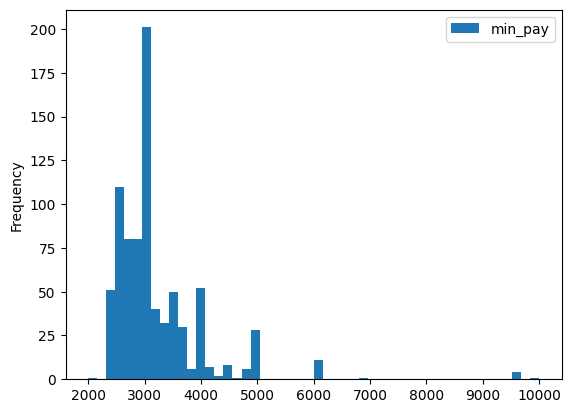

In [ ]:
df.plot(y='min_pay',kind='hist',bins=50)

<Axes: ylabel='Frequency'>

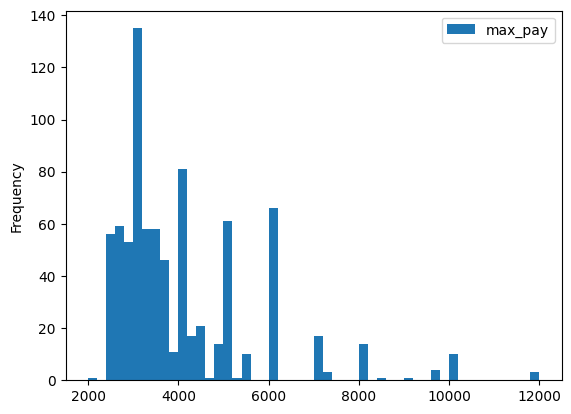

In [ ]:
df.plot(y='max_pay',kind='hist',bins=50)

## position

In [ ]:
import ast

x = ast.literal_eval("['서버/벡엔드', 'DBA', '데브옵스']")
print(x)
x[0]

['서버/벡엔드', 'DBA', '데브옵스']


'서버/벡엔드'

In [ ]:
# 리스트 형태의 문자열을 리스트로 바꾸는 법!
# https://somjang.tistory.com/entry/Python-str-%ED%98%95%EC%8B%9D%EC%9D%98-list-%EB%AC%B8%EC%9E%90%EC%97%B4-list-%ED%98%95%EC%8B%9D%EC%9C%BC%EB%A1%9C-%EB%B3%80%ED%99%98%ED%95%98%EB%8A%94-%EB%B0%A9%EB%B2%95-str-list-to-list-python
import ast

positions = []
def pos(string):
  try:
    print(ast.literal_eval(string))
    return ast.literal_eval(string)
  except ValueError:
    return []

positions.extend(df['position'].apply(pos))

In [ ]:
positions = np.concatenate(positions).tolist() # 2차원 -> 1차원

In [ ]:
pd.Series(positions).value_counts()

시스템/네트워크      123
인공지능(AI)       97
iOS            89
웹 풀스택          74
시스템 소프트웨어      67
블록체인           61
응용 프로그램        61
안드로이드          33
모바일 게임         33
인터넷 보안         28
임베디드 소프트웨어     27
데브옵스           26
프론트엔드          26
서버/백엔드         26
QA             26
개발PM           25
데이터 엔지니어링      22
웹 퍼블리싱         19
로보틱스 미들웨어      17
ERP            15
머신러닝            8
DBA             7
게임 클라이언트        4
게임 서버           4
dtype: int64

In [ ]:
pd.Series(positions).value_counts().plot.bar()

In [ ]:
# pos_df = pd.DataFrame({'position':positions})
# sns.countplot(x="position", data=pos_df)

In [ ]:
# from matplotlib import font_manager, rc

# #font_name = font_manager.FontProperties(fname="C:/Windows/Fonts/FZSong_Super.ttf").get_name()
# rc('font', family='Malgun Gothic')

In [ ]:
# from google.colab import drive
# import openpyxl
# data=pd.concat([df1, df2, df3, df4, df5, df6, df7, df8, df9, df10], ignore_index=True)

# drive.mount('/content/drive')
# data.to_excel("/content/drive/My Drive/CAPSTONE/크롤링/워크넷_데이터_230407.xlsx",encoding='utf-8')

# DB 연동

In [ ]:
!pip install pymysql

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.7/43.7 kB 1.4 MB/s eta 0:00:00


In [ ]:
import numpy as np
import pymysql
import pandas as pd
import sqlalchemy
from sqlalchemy import create_engine

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/크롤링/크롤링데이터_워크넷/워크넷_데이터_20230511.csv")

In [ ]:
df.head()

,Unnamed: 0.1,Unnamed: 0,content,dead,deadline,info_loc,info_pos,info_tech,last_check,max_career,max_pay,min_career,min_pay,title,type,info_cp_name,reg_date
0,0,0,"<div class=""careers-table"">\n<table>\n<caption...",0.0,2023-07-01,4.143032e+11,['시스템/네트워크'],[],2023-05-10,-1.0,2520.0,-1.0,2520.0,NH농협생명 전산상황실 관리,10.0,엠제이인스텍,2023-05-10
1,1,1,"<div class=""careers-table"">\n<table>\n<caption...",0.0,2023-07-09,4.311432e+11,['웹 퍼블리싱'],[],2023-05-10,-1.0,2500.0,-1.0,2500.0,나우픽스 웹디자이너 모집,10.0,나우픽스,2023-05-10
2,2,2,"<div class=""careers-table"">\n<table>\n<caption...",0.0,2023-07-09,1.168042e+11,"['머신러닝', '인공지능(AI)']",[],2023-05-10,20.0,6000.0,1.0,4200.0,"전자 입찰 분석 하실 분 구합니다.(전기,소방,통...",10.0,경림전기,2023-05-10
3,3,3,"<div class=""careers-table"">\n<table>\n<caption...",0.0,2023-06-10,4.115034e+11,"['iOS', '인공지능(AI)']",['php'],2023-05-10,20.0,4500.0,1.0,3000.0,PHP 개발 가능한 개발자 를 모집합니다. (1...,10.0,주식회사 셈틀컴퍼니,2023-05-10
4,4,4,"<div class=""careers-table"">\n<table>\n<caption...",0.0,2023-06-01,1.144021e+11,['시스템/네트워크'],[],2023-05-10,20.0,6173.0,1.0,3671.0,[(사)경찰공제회] 전산정보 일반직 직원 채용,20.0,경찰공제회,2023-05-10


In [ ]:
df.columns

Index(['Unnamed: 0', 'company_name', 'title', 'min_pay', 'max_pay', 'info_loc',
       'type', 'regDt', 'deadline', 'position', 'post_url', 'content',
       'min_career', 'max_career', 'dead', 'last_check'],
      dtype='object')

In [ ]:
df = df.rename(columns={"company_name":"info_cp_name",
                        "location":"info_loc",
                        "position":"info_pos",
                        "tech":"info_tech",
                        "post_url":"info_url",
                        "last_check":"last_check",
                        "regDt":"reg_date"})

In [ ]:
df['type'].value_counts()

10    788
20    103
11     11
21      4
Name: type, dtype: int64

In [ ]:
def change_type(row):
  if row['type'] == 10 or row['type']==11:
    return 0
  return 1
df['type'] = df.apply(change_type, axis = 1)

In [ ]:
company_list = ['삼성에스디에스',
 '더존비즈온',
 '롯데정보통신',
 '카페24',
 'SK텔레콤',
 '안랩',
 '케이티알파',
 '엔에이치엔',
 '현대오토에버',
 '다우기술',
 '팅크웨어',
 '컴투스',
 '네오위즈',
 '현대이지웰',
 '코나아이',
 '위메이드',
 '웹젠',
 '한글과컴퓨터',
 '골프존',
 '드림어스컴퍼니',
 '인베니아',
 '파수',
 '푸드나무',
 '다날',
 '이지케어텍',
 '쌍용정보통신',
 '가비아',
 '지어소프트',
 '콤텍시스템',
 '비트컴퓨터',
 '유비케어',
 '웹케시',
 '이니텍',
 '유비벨록스',
 '한솔인티큐브',
 '싸이버원',
 '바이브컴퍼니',
 '대신정보통신',
 '영림원소프트랩',
 '인포뱅크',
 '엔텔스',
 '유엔젤',
 '인피니트헬스케어',
 '파이오링크',
 '투비소프트',
 '라온시큐어',
 '미디어젠',
 '토비스',
 '엠로',
 '이루온',
 '한국정보통신',
 '브리지텍',
 '라온피플',
 '딜리',
 '링네트',
 '에이트원',
 '위세아이텍',
 '오픈베이스',
 '갤럭시아머니트리',
 '시큐브',
 '핑거',
 '세종텔레콤',
 '엠게임',
 '아이티센',
 '누리플렉스',
 '앱코',
 '오파스넷',
 '위메이드플레이',
 '네이블커뮤니케이션즈',
 '케이아이엔엑스',
 '인포바인',
 '대아티아이',
 '시티랩스',
 '텔코웨어',
 '액토즈소프트',
 '포인트모바일',
 '포시에스',
 '헥토이노베이션',
 '에스에스알',
 '아이퀘스트',
 '다우데이타',
 '아이크래프트',
 '베스파',
 '라이프시맨틱스',
 '케이엘넷',
 '헥토파이낸셜',
 '에프앤가이드',
 '디아이티',
 '씨이랩',
 '와이더플래닛',
 '아톤',
 '플레이위드',
 '네오리진',
 '한국전자인증',
 '나이스정보통신',
 '한국정보인증',
 '티사이언티픽',
 '엑스큐어',
 '디지캡',
 '수산아이앤티',
 '키네마스터',
 '소프트센',
 '룽투코리아',
 '로보티즈',
 '엘지유플러스',
 '네이버',
 '케이티씨에스',
 '효성아이티엑스',
 'KT아이에스',
 '엘에스산전',
 '나이스평가정보',
 '커넥트웨이브',
 '신세계아이앤씨',
 '아프리카티비',
 '케이지이니시스',
 '예스이십사',
 '포스코아이씨티',
 '사람인',
 '카카오',
 '카카오엔터테인먼트',
 '네이버웹툰',
 '넥슨코리아',
 '버킷플레이스',
 '우아한형제들',
 '브랜디',
 '무신사',
 '쿠팡',
 '페이스북코리아',
 '구글코리아',
 '하이브랩',
 '지니뮤직',
 '샌드박스네트워크']

In [ ]:
def company_name_isin(x):
  for c in company_list:
    if c in str(x['info_cp_name']):
      print(x['info_cp_name'], c)
      x['info_cp_name'] = c
  return x

df = df.apply(company_name_isin, axis=1)

비트컴퓨터 비트컴퓨터
케이아이엔엑스 케이아이엔엑스
제트핑거소프트 핑거
에이아이크래프트 아이크래프트


In [ ]:
df['info_cp_name'] = df['info_cp_name'].replace("아이크래프트","에이아이크래프트")
df['info_cp_name'] = df['info_cp_name'].replace("핑거","제트핑거소프트")

In [ ]:
df = df[['dead', 'deadline', 'info_loc','info_pos','info_tech','last_check','max_career','max_pay','min_career','min_pay','title','type','info_cp_name','content','reg_date']]

In [ ]:
host = 'itcareerfit.cc5um8ekupdb.ap-northeast-2.rds.amazonaws.com'
port = 3306
user_name = 'admin'
password = 'teamone!'
db = 'itcareerfit'


db_connection_str = 'mysql+pymysql://'+user_name+':'+password + "@"+ host+ ":" + str(port)+"/"+db
db_connection = create_engine(db_connection_str)
conn = db_connection.connect()

dtypesql = {
    'info_cp_name':sqlalchemy.types.VARCHAR(45),
    'title' : sqlalchemy.types.VARCHAR(45),
    'deadline' : sqlalchemy.types.DateTime(),
    'type' : sqlalchemy.types.INTEGER,
    'info_loc' : sqlalchemy.types.VARCHAR(45),
    'info_pos' : sqlalchemy.types.TEXT,
    'info_tech' : sqlalchemy.types.TEXT,
    'min_career' : sqlalchemy.types.INTEGER,
    'max_career' : sqlalchemy.types.INTEGER,
    'min_pay' : sqlalchemy.types.INTEGER,
    'max_pay' : sqlalchemy.types.INTEGER,
    'content' : sqlalchemy.types.TEXT,
    'dead' : sqlalchemy.types.INTEGER,
    'last_check' : sqlalchemy.types.DateTime,
    'reg_date': sqlalchemy.types.DateTime,
    'info_url': sqlalchemy.types.TEXT
}

df.to_sql('trend', if_exists='append', con = db_connection,index = False,dtype = dtypesql)

866

In [ ]:
df.drop(['Unnamed: 0.1'], axis = 1, inplace = True)

In [ ]:
df.head()

,content,dead,deadline,info_loc,info_pos,info_tech,last_check,max_career,max_pay,min_career,min_pay,title,type,info_cp_name,reg_date
0,"<div class=""careers-table"">\n<table>\n<caption...",0.0,2023-07-01,4.143032e+11,['시스템/네트워크'],[],2023-05-10,-1.0,2520.0,-1.0,2520.0,NH농협생명 전산상황실 관리,10.0,엠제이인스텍,2023-05-10
1,"<div class=""careers-table"">\n<table>\n<caption...",0.0,2023-07-09,4.311432e+11,['웹 퍼블리싱'],[],2023-05-10,-1.0,2500.0,-1.0,2500.0,나우픽스 웹디자이너 모집,10.0,나우픽스,2023-05-10
2,"<div class=""careers-table"">\n<table>\n<caption...",0.0,2023-07-09,1.168042e+11,"['머신러닝', '인공지능(AI)']",[],2023-05-10,20.0,6000.0,1.0,4200.0,"전자 입찰 분석 하실 분 구합니다.(전기,소방,통...",10.0,경림전기,2023-05-10
3,"<div class=""careers-table"">\n<table>\n<caption...",0.0,2023-06-10,4.115034e+11,"['iOS', '인공지능(AI)']",['php'],2023-05-10,20.0,4500.0,1.0,3000.0,PHP 개발 가능한 개발자 를 모집합니다. (1...,10.0,주식회사 셈틀컴퍼니,2023-05-10
4,"<div class=""careers-table"">\n<table>\n<caption...",0.0,2023-06-01,1.144021e+11,['시스템/네트워크'],[],2023-05-10,20.0,6173.0,1.0,3671.0,[(사)경찰공제회] 전산정보 일반직 직원 채용,20.0,경찰공제회,2023-05-10


In [ ]:
pymysql.install_as_MySQLdb()
import MySQLdb

db_connection_str = 'mysql+mysqldb://'+user_name+':'+password + "@"+ host+ ":" + str(port)+"/"+db
db_connection = create_engine(db_connection_str, pool_recycle=3600)
conn = db_connection.connect()

OperationalError: ignored

In [ ]:
dtypesql = {'company_name':sqlalchemy.types.VARCHAR(45),
            'title':sqlalchemy.types.VARCHAR(45),
            'deadline':sqlalchemy.types.DATETIME(),
            'type'}
# https://hongjuzzang.github.io/howto/dataframe_to_mysql/